In [1]:
import os
import glob
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Menyesuaikan path directory 
path=os.chdir("E:\\Data Set Multi Bahasa\\Contoh")

# Membaca file dan menyimpannya pada images
def read_img(path):
    # input: path
    # output: list dengan nama images 
    images = [cv2.imread(file) for file in glob.glob("*.jpg")]
    return images
#===================================================================
# Tampil image dalam list
def tampil(images):
    # input: list images
    # output: hasil plot 6 image 
    for i in range(0,len(images)):
        plt.imshow(images[i],cmap='gray')
        plt.xticks([]), plt.yticks([])
        plt.show()
# ================================================================== 
# Resize untuk satu citra 
# Mengubah lebar citra jadi 480
NEW_WIDTH  = 480

def resize_img(img):
    # input: image
    # output: image yang diresize
    new_height = NEW_WIDTH * img.shape[0] // img.shape[1] 
    dim = (NEW_WIDTH, new_height)
    img_resize = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
    return img_resize
# ==================================================================  
# Memproses Negatif image   
def negatif_rgb(img):
    # input: image rgb
    # output: negatif image rgb
    # Dapatkan tinggi dan lebar 
    height, width, _ = img.shape

    for i in range(0, height - 1): 
        for j in range(0, width - 1): 
       
            # Dapatkan nilai pixel 
            pixel = img[i, j] 
            img[i, j] = 255-pixel
            
    return img

def negatif_image(img):
    """Negatif image untuk rgb dan grayscale"""
    # input: image grayscale
    # output: negative grayscale
    # Periksa gray scale atau rgb
    if len(img.shape)==2:
        img_neg= 255 - img
    else:
        img_neg=negatif_rgb(img)
    return img_neg

# =================================================================
# Slice H, S, V
def slice_img(img):
    # input: image HSV
    # output: slice masing-masing nilai H,S,V 
    H = img[:,:,0]; S = img[:,:,1]; V = img[:,:,2]
    return H,S,V

# ================================================================== 
# Convert resize image from BGR to RGB
def resize_RGB(img):
    # input : 1 image BGR
    # output : 1 image RGB dan telah diresize
    img_resize=resize_img(img)
    img_rgb= cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
    return img_rgb

# ================================================================== 
# Preprocessing Hasil akhir list 6 image
def preprocessing(images):
    # input: images
    # output: List image hasil praproses
    # Praproses: resize, grayscale, hsv, convert negative
    # setiap baris ada 6 gambar (kolom)
    # jumlah baris sebanyak data set
    hasil = []
    
    for image in images:
        # Resize
        img_resize = resize_RGB(image)
        
        # RGB ke Gray 
        gray = cv2.cvtColor(img_resize, cv2.COLOR_RGB2GRAY)
        
        # Convert ke HSV
        hsv = cv2.cvtColor(img_resize, cv2.COLOR_RGB2HSV)
        
        # Negatif Gray
        neg_gray = negatif_image(gray)

# Untuk negasi dr RGB baru k HSV
#         # Negatif RGB untuk diconvert ke HSV
#         neg_img = negatif_image(img)
#         # Negatif HSV
#         neg_hsv = cv2.cvtColor(neg_img, cv2.COLOR_RGB2HSV)
        
        # Ekstrak H, S
        H,S,_ = slice_img(hsv)
#        neg_H,neg_S,_ = slice_img(neg_hsv)
        
        # Negasi H dan S
        neg_H = negatif_image(H)
        neg_S = negatif_image(S)
        
        # Penggabungan dalam satu list
        im =[gray, neg_gray, H,neg_H, S, neg_S]
        
        # Append list hasil
        hasil.append(im)
    
    return hasil 
# ================================================================

In [2]:
# Test preproses
# Baca citra 
images=read_img(path)
# Convert RGB dan Resize
images_rgb=[resize_RGB(image) for image in images]

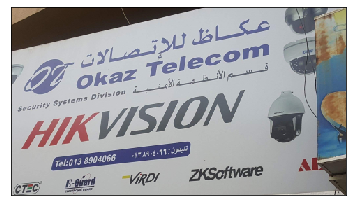

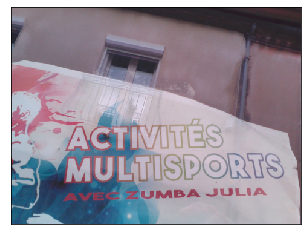

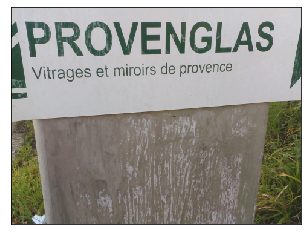

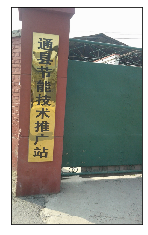

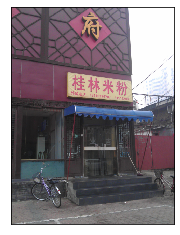

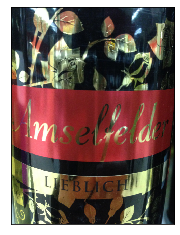

In [3]:
# Plotting
URUTAN = 0 # urutan gambar dalam file yang akan ditampilkan
tampil (images_rgb)

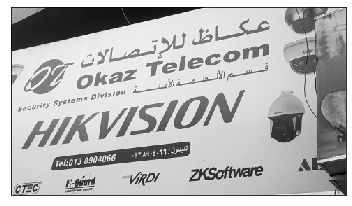

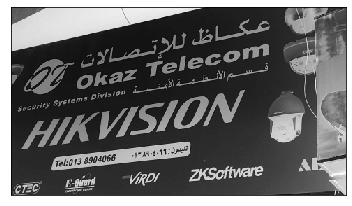

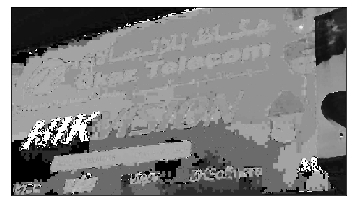

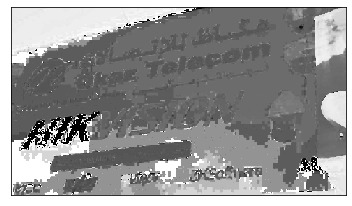

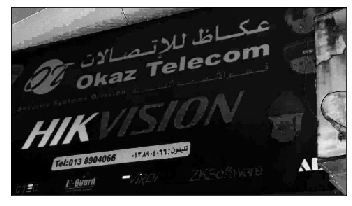

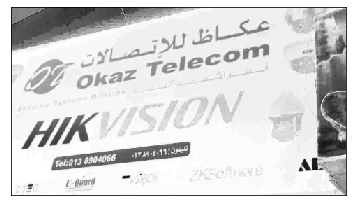

In [4]:
# Preproses
hasil_pre  = preprocessing(images)

# Plotting
tampil (hasil_pre[URUTAN])

In [5]:
# Menampilkan max tree
#Membuat max tree
import matplotlib.pyplot as plt
import numpy as np

# folder maxtree, nama file component_tree, nama kelas MaxTree
from maxtree.component_tree import MaxTree

def bbox(feat):
    # Mengambil semua nilai x1,y1 dan x2,y2 dari feat
    # input: feature
    # output: nilai x1,y1 dan x2,y2
    # x1,y1,x2,y2 adalah vektor2 kolom
    x1= feat[:,0]
    y1= feat[:,1]
    x2= feat[:,2]
    y2= feat[:,3]
    return x1,y1,x2,y2
# =====================================================
def draw_bbox(x1,y1,x2,y2,img):
    # Input: list(x1,y1,x2,y2) dan image 
    # Output: image dengan bbox
    
    # Buat copy image
    image=img.copy()
    # Looping untuk memunculkan bounding box hasil maxtree
    for i in range (len(x1)):
        cv2.rectangle(image, (x1[i], y1[i]), (x2[i], y2[i]), (255, 255, 0), 1)
    return image
# =====================================================
def create_tree(img):
    # input: image
    # output: maxtree dan featurenya
    # convert image ke integer 16
    img = np.uint16(img)
    
    # # Hitung max tree dan shape attributes
    mt = MaxTree(img) 
    #print(mt)
    feat=mt.compute_shape_attributes() 
    feat=feat.astype(np.int)
    return mt,feat
# =====================================================
def tampil_bbox(imgs, img_rgb):
    # input: list 6 img, img_rgb
    # output: image dengan bounding box untuk menunjukkan cc
    # convert image
    img_box=[]
    for i in range(0,len(imgs)):
        mt,feat=create_tree(imgs[i])
        
        x1,y1,x2,y2=bbox(feat)

        # plot image 
        image=draw_bbox(x1,y1,x2,y2,img_rgb)
        img_box.append(image)
    return img_box 

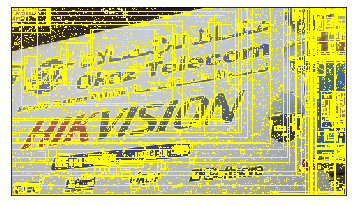

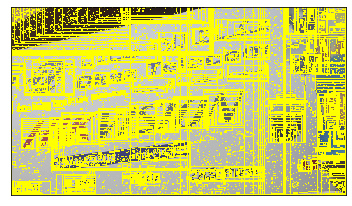

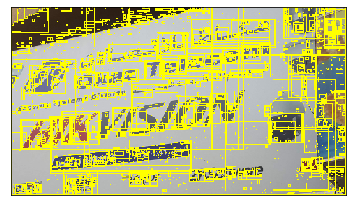

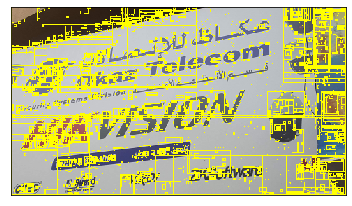

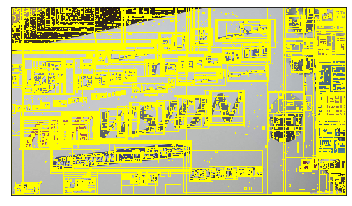

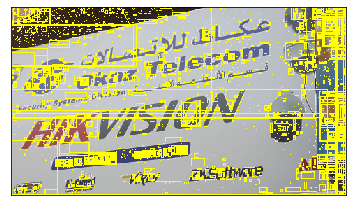

In [6]:
# ====================================================
# Cek fungsi 
# ====================================================
# Untuk satu image 
img = hasil_pre[URUTAN]
# Citra yang telah tandai dengan bbox semua CC
img_bbox=tampil_bbox(img, images_rgb[URUTAN])
# set ukuran citra
# Tampilkan citra
tampil (img_bbox)

In [7]:
# Melakukan filtering dengan menghitung perbedaan luas antar layer
def filter_layer(list_img):
    list_tresh = []
    for img in list_img:
        lyr = np.float32(list_img)
        mt.compute_layer_attributes(lyr)
    return
    

In [8]:
# Hitung nilai rata-rata per 1 image
# def rata_rata(values):
#     for value in values:
#         average = sum(values)/len(values)
#     return average

def hitung_t(list_img):
    # input list 6 image untuk 1 data
    # output average Area, H, W, dalam bentuk list
    # digunakan sebagai treshold
    list_tresh = []
    for img in list_img:
        # Create max tree dan feature
        mt,feat=create_tree(img)
        area = mt.getAttributes('area') 
        xmin = mt.getAttributes('xmin')
        xmax = mt.getAttributes('xmax')
        ymin = mt.getAttributes('ymin')
        ymax = mt.getAttributes('ymax')
        
        # Height & Width
        height = ymax-ymin
        width = xmax-xmin
        
        # Average
        t_area = np.average(area)
        t_height = np.average(height)
        t_width = np.average(width)
        
        tresh = (t_area.astype(int), t_height.astype(int), t_width.astype(int))
        list_tresh.append(tresh)
    return list_tresh

In [9]:
# Hitung Treshold untuk tiap image 
t=hitung_t(hasil_pre[URUTAN])
print("Rata-rata luas area, tinggi, lebar :", t)

Rata-rata luas area, tinggi, lebar : [(1121, 5, 7), (450, 7, 12), (1497, 7, 12), (1336, 7, 12), (336, 9, 12), (2421, 8, 13)]


In [10]:
# Ekstraksi Kandidat Komponen

# Set Parameter T_HEIGHT, T_WIDTH, T_AREA
# T_HEIGHT = 5
# T_WIDTH = 5
# T_AREA = 80

# Fungsi untuk mengatur plotting gambar
def plot_filter(imgs,imgs_filter):
    # n adalah banyak citra
    n = len(imgs)
    
    plt.xticks([]), plt.yticks([])
    for i in range(0,n):
        # indeks citra
        index_1=(2*i)+1
        index_2=2*(i+1)
        
        plt.subplot(n,2,index_1)
        plt.imshow(imgs[i], cmap='Greys_r')
        plt.title('Citra Awal')
        
        plt.subplot(n,2,index_2)
        plt.imshow(imgs_filter[i], cmap='Greys_r')
        plt.title('CC hasil filter')

#===========================================================================
def ekstraksi(im):
    # Input: list 6 citra
    # Output : list citra hasil filter
    # Inisialisasi list untuk 6 image
    ekstraksi_image=[]
    for img in im:
        # buat tree
        mt,feat=create_tree(img)

        # retrieve the area, heigth and width of each connected components
        area = mt.getAttributes('area') 
        xmin = mt.getAttributes('xmin')
        ymin = mt.getAttributes('ymin')
        xmax = mt.getAttributes('xmax')
        ymax = mt.getAttributes('ymax')
        
         # Height & Width
        height = ymax-ymin
        width = xmax-xmin
        
        # Average
        t_area = np.average(area)
        t_height = np.average(height)
        t_width = np.average(width)
        
        # Set Ruled untuk proses filter
        a=(height>7*t_height)
        b=(width>7*t_width)
        c= np.logical_and(height<0.1*t_height, width<0.1*t_width)
        d=(area>7*t_area)
        e=(area<0.01*t_area)

        # Gabungkan ruled untuk filtering
        #ruled = np.logical_or(a,np.logical_or(b,np.logical_or(c,np.logical_or(d,e))))
        ruled = np.logical_or(a,np.logical_or(b,np.logical_or(c,np.logical_or(d,e))))
        idx_retained = np.logical_not(ruled).nonzero()[0] 

        # Filtering
        img_filter = mt.filter(idx_retained)
        ekstraksi_image.append(img_filter)
        
    return ekstraksi_image

#==================================================================================        

In [11]:
# Coba Fungsi
image_con = ekstraksi(hasil_pre[URUTAN])

# Tampilkan citra hasil filter
plt.figure(figsize=(100, 200))
plot_filter(hasil_pre[URUTAN],image_con)


In [12]:
# Ekstraksi dengan MSER

def ekstraksi_mser(images):
    # input : masukan 1 citra gambar
    # output region of MSER untuk 1 citra gambar
    mser = cv2.MSER_create(_min_area = 10, _max_area=5000, _max_variation = 0.7)       
    regions, _ = mser.detectRegions(images) # regions, bbox
    # region bisa untuk estimasi bbox atau gunakan bbox atau gunakan convexhull
    hasil = estimasi_box(regions)
    return hasil

#===================================================================
# Estimasi bounding box per gambar

def estimasi_box(regions):
    # input : list regions dari 1 citra
    # output : [x,y,w,h] per 1 citra
    list_mser=[]
    for region in regions:
        # estimasi daerah 
        rect = cv2.minAreaRect(region)
        # tentukan empat titik
        box = cv2.boxPoints(rect)
        # convert ke integer
        box = np.int0(box)
        # tambahkan ke dalam list_mser
        list_mser.append(box)
    return list_mser

#===================================================================
# Buat bounding box MSER dan plot gambar
def mser_bbox(list_mser, img_rgb):
    # input: 1 image dg list mser bbox, img_bgr
    # output: image dengan bounding box untuk menunjukkan cc
    
    # Untuk setiap list gambar
    for box in list_mser:
        # plot image 
        cv2.drawContours(img_rgb,[box],0,(255,0,0),2)
    return img_rgb

#=====================================================================
# Menentukan MSER pada list 6 image
def list_mser(hasil_pre, list_image):
    # input : list 6 image hasil preprocessing dan 1 image rgb yang sudah di resize
    list_box=[]
    for i in range(0,len(hasil_pre)):
        image=list_image.copy()
        images_mser = ekstraksi_mser(hasil_pre[i])
        mser_box= mser_bbox(images_mser, image)
        list_box.append(mser_box)
    return list_box
        

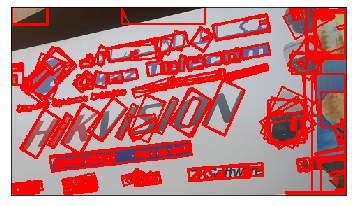

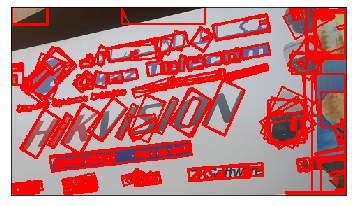

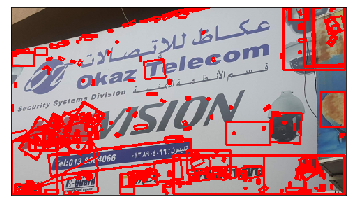

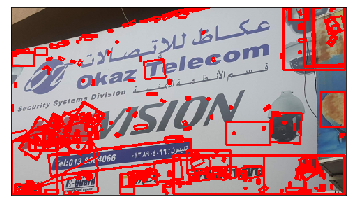

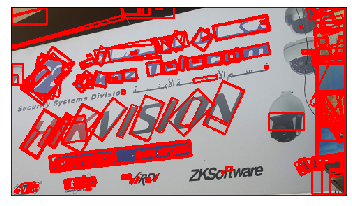

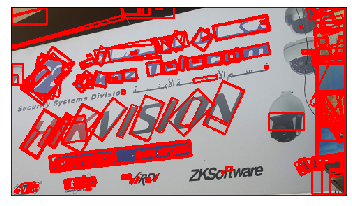

In [13]:
# untuk 6 gambar ekstraksi mser
# images_rgb[URUTAN] = 1 data
# hasil_pre[URUTAN] = hasil preprocessing jadi 6 citra
hasil_mser = list_mser(hasil_pre[URUTAN], images_rgb[URUTAN])
# plotting image
tampil (hasil_mser)

In [14]:
# =================================================================
# MSER region dengan bounding box horizontal
# Estimasi dengan convex hull
def estimate_box(regions,image):
    # input : list regions dari 1 citra dan 1 citra awal
    # output : [x,y,w,h] per 1 citra
    
    hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
    for hull in hulls:
        # estimasi daerah 
        x,y,w,h = cv2.boundingRect(hull)
        area=w*h
        if (w==0) or (h==0) or (area<10):
            continue
            
        cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 1)
    return image

#===================================================================
# Menentukan MSER pada list 6 image
def list_mser(hasil_pre, list_image):
    # input : list 6 image hasil preprocessing dan 1 image rgb yang sudah di resize
    list_box=[]
    for i in range(0,len(hasil_pre)):
        image=list_image.copy()
        mser=ekstraksi_mser(hasil_pre[i])
        mser_box = estimate_box(mser,image)
        list_box.append(mser_box)
    return list_box

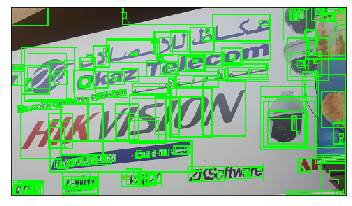

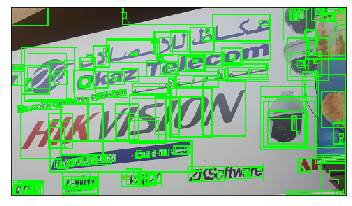

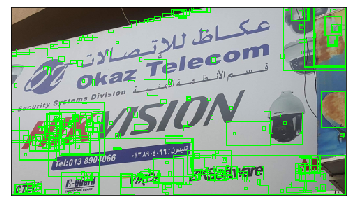

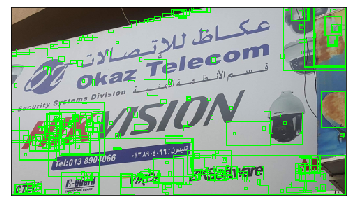

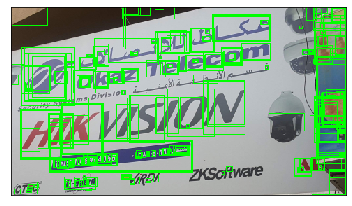

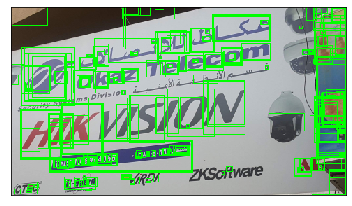

In [15]:
# untuk 6 gambar ekstraksi mser
# images_rgb[URUTAN] = 1 data
# hasil_pre[URUTAN] = hasil preprocessing jadi 6 citra
hasil_mser = list_mser(hasil_pre[URUTAN], images_rgb[URUTAN])
# plotting image
tampil (hasil_mser)

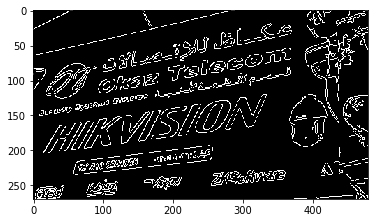

In [16]:
edged=cv2.Canny(hasil_pre[URUTAN][0],30,200)
plt.imshow(edged, cmap="gray")